In [1]:
# Import NumPy and Pandas 
import numpy as np
import pandas as pd

# Import Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv('salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Overview
print('Info -', df.info(), '\n')
print('Stats -', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
Info - None 

Stats -        YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


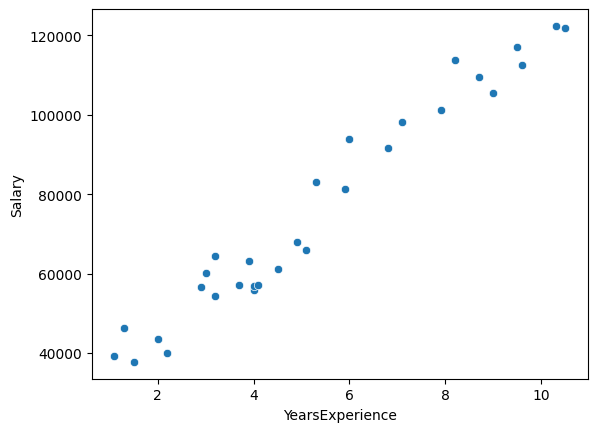

In [4]:
plt.figure()
sns.scatterplot(df, x='YearsExperience', y='Salary')
plt.show()

In [5]:
X = df.YearsExperience
y = df.Salary

In [6]:
from sklearn.model_selection import train_test_split as tts
tX,vX,ty,vy = tts(X,y,train_size=0.7,test_size=0.3,random_state=0)

In [7]:
tX = tX[:, np.newaxis]
vX = vX[:, np.newaxis]
tX.ndim

C:\Users\Bimalsagar H K\AppData\Local\Temp\ipykernel_13196\1827296047.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tX = tX[:, np.newaxis]
C:\Users\Bimalsagar H K\AppData\Local\Temp\ipykernel_13196\1827296047.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  vX = vX[:, np.newaxis]


2

In [8]:
# model
from sklearn.linear_model import LinearRegression as lr
model = lr()
model.fit(tX, ty)
pred = model.predict(vX)

In [9]:
print('Coef', model.coef_)
print('Intercept', model.intercept_)

Coef [9360.26128619]
Intercept 26777.391341197625


Text(0, 0.5, 'Salary')

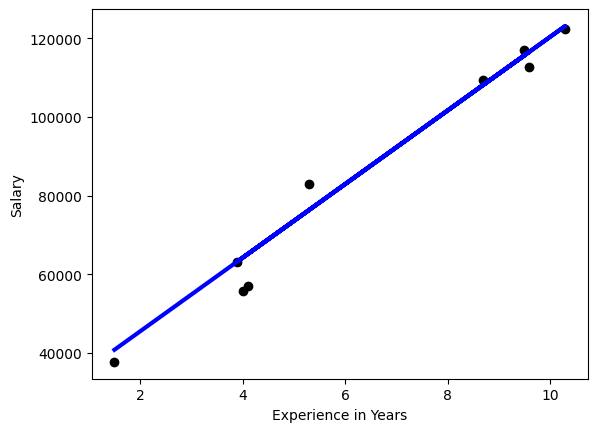

In [10]:
# plot linear regression line
plt.scatter(vX, vy, color='black')
plt.plot(vX, pred, color='blue', linewidth=3)
plt.xlabel('Experience in Years')
plt.ylabel('Salary')

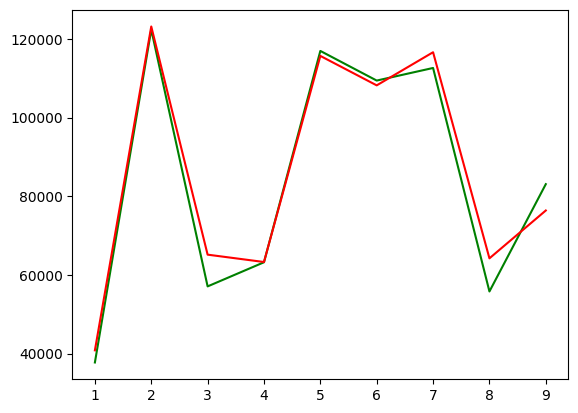

In [11]:
# plot prediction and validation target values and deviation
count = [x for x in range(1,len(vy)+1)]
plt.plot(count, vy, color='g', linestyle='-')
plt.plot(count, pred, color='r', linestyle='-')
plt.show()

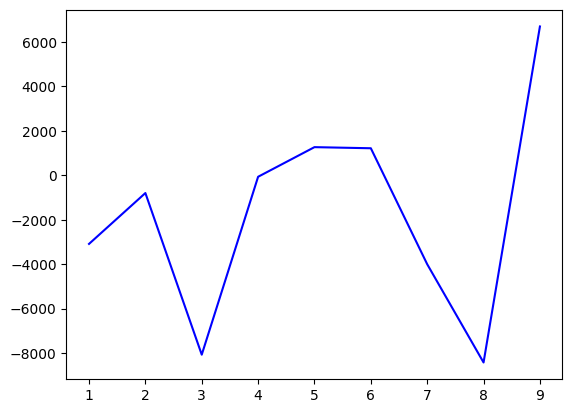

In [12]:
# plot error magnitude
plt.plot(count, vy-pred, color='blue', linestyle='-')

C:\Users\Bimalsagar H K\AppData\Local\Temp\ipykernel_13196\3607295464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vy-pred, bins=6)


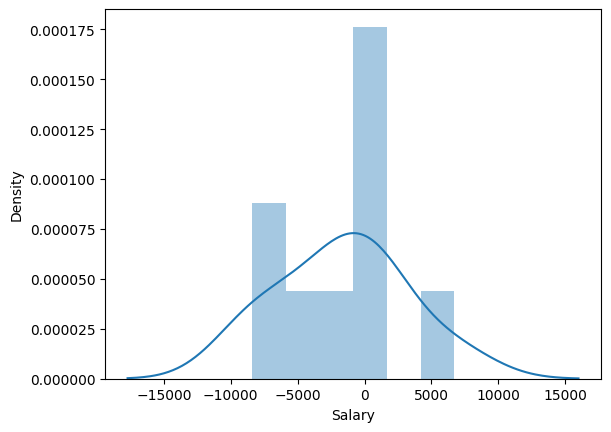

In [13]:
# plot error density distribution
sns.distplot(vy-pred, bins=6)
plt.show()

In [14]:
# evaluate model
from sklearn.metrics import mean_absolute_error,r2_score

print(mean_absolute_error(vy, pred))
print(r2_score(vy, pred))

3737.417861878896
0.9740993407213511
